In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from pathlib import Path
import hvplot.pandas
import xgboost as xgb

In [2]:
#Read data using Pandas into Dataframe
df1 = pd.read_csv('original_label_encoded.csv', index_col=0)
df1

,make,model,body,state,color,interior,condition,odometer,car_age,mmr,sellingprice
0,0,0,0,0,0,0,0,0,0,0,21500.0
1,0,0,0,0,0,1,0,1,0,1,21500.0
2,1,1,1,0,1,0,1,2,1,2,30000.0
3,2,2,1,0,0,0,2,3,2,3,27750.0
4,1,3,1,0,1,0,3,4,2,4,67000.0
...,...,...,...,...,...,...,...,...,...,...,...
558832,0,26,1,16,4,0,1,35094,2,902,33000.0
558833,32,213,6,28,0,0,0,35421,4,31,30800.0
558834,1,41,0,0,2,0,9,151441,4,196,34000.0
558835,3,4,27,13,0,0,14,74972,2,175,11100.0


In [3]:
#Quick view of highest price selling car
des_sorted_df = df1.sort_values(by='sellingprice', ascending=False)
des_sorted_df.head()

,make,model,body,state,color,interior,condition,odometer,car_age,mmr,sellingprice
344905,6,150,0,20,13,2,3,8626,1,81,230000.0
548169,29,771,56,8,3,0,24,90927,5,1098,183000.0
446949,14,57,1,0,0,7,2,123685,2,1070,173000.0
545523,44,508,27,8,0,1,7,4586,3,1097,171500.0
125095,44,508,1,8,2,1,1,21452,4,1044,169500.0


In [4]:
#Quick view of highest price selling car
asc_sorted_df = df1.sort_values(by='sellingprice', ascending=True)
asc_sorted_df.head()

,make,model,body,state,color,interior,condition,odometer,car_age,mmr,sellingprice
48453,14,69,1,13,2,0,28,663,13,655,1.0
348252,45,564,0,14,3,4,4,141433,21,861,1.0
293223,6,170,20,1,0,4,2,86007,1,1,1.0
205309,28,257,2,19,2,2,4,53370,14,772,100.0
281158,3,4,1,29,0,4,38,39189,13,803,100.0


In [5]:
#Drop values of Selling price less than $1
indices_to_drop = df1[df1['sellingprice'] < 10].index
df = df1.drop(indices_to_drop)
df

,make,model,body,state,color,interior,condition,odometer,car_age,mmr,sellingprice
0,0,0,0,0,0,0,0,0,0,0,21500.0
1,0,0,0,0,0,1,0,1,0,1,21500.0
2,1,1,1,0,1,0,1,2,1,2,30000.0
3,2,2,1,0,0,0,2,3,2,3,27750.0
4,1,3,1,0,1,0,3,4,2,4,67000.0
...,...,...,...,...,...,...,...,...,...,...,...
558832,0,26,1,16,4,0,1,35094,2,902,33000.0
558833,32,213,6,28,0,0,0,35421,4,31,30800.0
558834,1,41,0,0,2,0,9,151441,4,196,34000.0
558835,3,4,27,13,0,0,14,74972,2,175,11100.0


In [6]:
#Quick view of highest price selling car
sorted_df = df.sort_values(by='sellingprice', ascending=True)
sorted_df.head()

,make,model,body,state,color,interior,condition,odometer,car_age,mmr,sellingprice
466143,7,329,46,34,4,4,4,157292,10,806,100.0
353308,28,294,4,29,0,4,19,108498,8,709,100.0
25588,4,27,1,12,3,1,4,9868,13,847,100.0
449497,4,14,1,2,1,2,12,155286,13,851,100.0
409841,38,430,1,34,13,12,4,151433,21,853,100.0


Setting Features and Target Variables

In [7]:
# Select features and target variable
X = df.drop(['sellingprice','body', 'state', 'color', 'interior', 'condition','mmr' ], axis=1)
y = df['sellingprice']

In [8]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=30)       #Last random_test= 42

Training Model With Parameters

In [9]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

In [11]:
params = {
    'objective': 'reg:squarederror',    # Specify the type of regression task
    'eval_metric': 'mae',               # Evaluation metric for mean absolute error
    'eta': 0.1,                         # Learning rate
    'max_depth': 6,                     # Maximum depth of a tree
    'subsample': 0.8,                   # Subsample ratio of the training instances
    'colsample_bytree': 0.8,            # Subsample ratio of columns when constructing each tree
    'seed': 42                          # Random seed for reproducibility
}

In [12]:
# Train the model
num_rounds = 100  # Number of training rounds
xgb_model = xgb.train(params, dtrain, num_rounds)

In [13]:
#Make predictions and evaluate the model
# Predictions on the test set
y_pred = xgb_model.predict(dtest)

In [14]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error:", mae)

Mean Squared Error: 19814398.541476574
Mean Absolute Error: 2829.233168188952


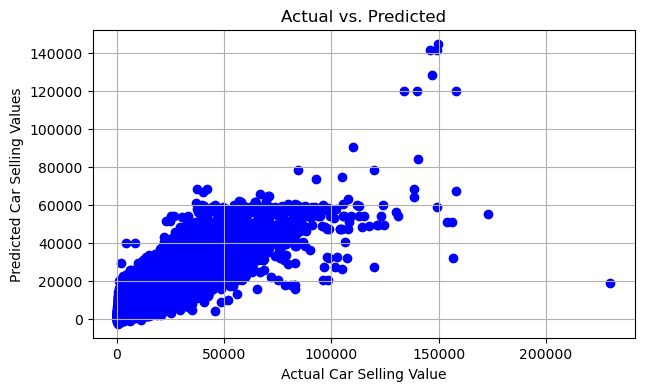

In [15]:
#Plot actual vs. predicted values
plt.figure(figsize=(7, 4))
plt.scatter(y_test, y_pred, color='blue')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Car Selling Value')
plt.ylabel('Predicted Car Selling Values')
plt.grid(True)
plt.show()

Parameters 2

In [16]:
params2 = {
    'objective': 'reg:squarederror',    # Specify the type of regression task
    'eval_metric': 'mae',               # Evaluation metric for mean absolute error
    'eta': 0.05,                           # Learning rate
    'max_depth': 10 ,                   # Maximum depth of a tree - the bigger takes longer to run
    'subsample': .05,                   # Subsample ratio of the training instances
    'colsample_bytree':.05 ,            # Subsample ratio of columns when constructing each tree
    'seed': 25                          # Random seed for reproducibility
}

In [17]:
# Train the model
num_rounds2 = 100  # Number of training rounds
xgb_model2 = xgb.train(params2, dtrain, num_rounds2)

In [18]:
#Make predictions and evaluate the model
# Predictions on the test set
y_pred2 = xgb_model2.predict(dtest)

In [19]:
# Calculate Mean Squared Error (MSE)
mse2 = mean_squared_error(y_test, y_pred2)
print("Mean Squared Error:", mse2)

# Calculate Mean Absolute Error (MAE)
mae2 = mean_absolute_error(y_test, y_pred2)
print("Mean Absolute Error:", mae2)

Mean Squared Error: 35697683.6558854
Mean Absolute Error: 3849.557441741413


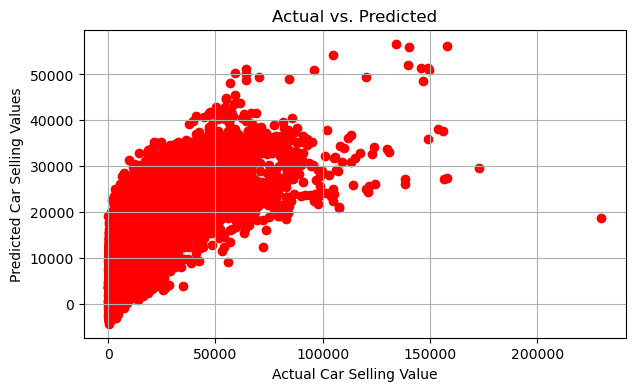

In [20]:
#Plot actual vs. predicted values
plt.figure(figsize=(7, 4))
plt.scatter(y_test, y_pred2, color='red')
plt.title('Actual vs. Predicted')
plt.xlabel('Actual Car Selling Value')
plt.ylabel('Predicted Car Selling Values')
plt.grid(True)
plt.show()


#Less Accurate as Depth tree is higher
#LEarning rate higher the better
#higher subsample, longer to run

#params2 = {
    #'objective': 'reg:squarederror',    # Specify the type of regression task
    #'eval_metric': 'mae',               # Evaluation metric for mean absolute error
    #'eta': 10,                           # Learning rate
    #'max_depth': 7 ,                   # Maximum depth of a tree - the bigger takes longer to run
    #'subsample': 0.9,                   # Subsample ratio of the training instances
    #'colsample_bytree': 0.9,            # Subsample ratio of columns when constructing each tree
    #'seed': 80                          # Random seed for reproducibility
}

##Summary: LEss Accurate as we asjust to higher parameters